In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
data = pd.read_csv("Automobile_data_Big.csv")

EXPLORATION

In [138]:
data.shape

(205, 26)

In [139]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [140]:
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [142]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

DATA CLEANING COMMENCES

In [143]:
data_copy = data.copy(deep='False')
data_copy = data_copy.drop(['normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system','bore','stroke','horsepower','peak-rpm','price'],axis=1)

In [144]:
data_copy.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


In [145]:
data_copy.fillna(data_copy.mean())

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,26,27


In [146]:
data_objects = data.copy([['normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system','bore','stroke','horsepower','peak-rpm','price']])

In [147]:
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Normalized-Losses "?" values set as column average. 


In [148]:
data_objects = data_objects.convert_dtypes()
data_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    Int64  
 1   normalized-losses  205 non-null    string 
 2   make               205 non-null    string 
 3   fuel-type          205 non-null    string 
 4   aspiration         205 non-null    string 
 5   num-of-doors       205 non-null    string 
 6   body-style         205 non-null    string 
 7   drive-wheels       205 non-null    string 
 8   engine-location    205 non-null    string 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    Int64  
 14  engine-type        205 non-null    string 
 15  num-of-cylinders   205 non-null    string 
 16  engine-size        205 non

In [149]:
data_objects['normalized-losses'] = pd.to_numeric(data_objects['normalized-losses'], errors="coerce")

In [150]:
data_objects['normalized-losses'] = data_objects['normalized-losses'].fillna((data_objects['normalized-losses'].mean()), inplace=False)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Convert Fuel Type to Numeric Values


In [151]:
data_objects['fuel-type'].unique()

<StringArray>
['gas', 'diesel']
Length: 2, dtype: string

In [153]:
data_objects['fuel-type'] = data_objects['fuel-type'].replace(to_replace="gas",value=1)
data_objects['fuel-type'] = data_objects['fuel-type'].replace(to_replace="diesel",value=2)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,1,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,1,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,1,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Convert Aspiration to Numeric Values

In [152]:
data_objects['aspiration'].unique()

<StringArray>
['std', 'turbo']
Length: 2, dtype: string

In [154]:
data_objects['aspiration'] = data_objects['aspiration'].replace(to_replace="std",value=1)
data_objects['aspiration'] = data_objects['aspiration'].replace(to_replace="turbo",value=2)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,1,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,1,1,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,1,1,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,1,1,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Convert Number of Doors to Numeric Values

In [155]:
data_objects['num-of-doors'].unique()

<StringArray>
['two', 'four', '?']
Length: 3, dtype: string

In [156]:
data_objects['num-of-doors'] = data_objects['num-of-doors'].replace(to_replace="two",value=2)
data_objects['num-of-doors'] = data_objects['num-of-doors'].replace(to_replace="four",value=4)
data_objects['num-of-doors'] = data_objects['num-of-doors'].replace(to_replace="?",value=0)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,1,1,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,1,1,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,1,1,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,1,1,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Convert Body Style to Numeric Values


In [157]:
data_objects['body-style'].unique()

<StringArray>
['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
Length: 5, dtype: string

In [158]:
data_objects = data_objects.replace(to_replace="convertible",value=1)
data_objects = data_objects.replace(to_replace="hatchback",value=2)
data_objects = data_objects.replace(to_replace="sedan",value=3)
data_objects = data_objects.replace(to_replace="wagon",value=4)
data_objects = data_objects.replace(to_replace="hardtop",value=5)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,2,1,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,1,1,2,1,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,1,1,2,2,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,1,1,4,3,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,1,1,4,3,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Convert Drive Wheels to Numeric Values


In [159]:
data_objects['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [160]:
data_objects = data_objects.replace(to_replace="rwd",value=1)
data_objects = data_objects.replace(to_replace="fwd",value=2)
data_objects = data_objects.replace(to_replace="4wd",value=4)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,2,1,1,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,1,1,2,1,1,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,1,1,2,2,1,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,1,1,4,3,2,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,1,1,4,3,4,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Convert Engine Location to Numeric Value

In [161]:
data_objects['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [107]:
data_objects = data_objects.replace(to_replace="front",value=1)
data_objects = data_objects.replace(to_replace="rear",value=2)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,1,1,2,2,1,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,1,1,4,3,2,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,1,1,4,3,4,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Convert Engine Type to Numeric Value

In [108]:
data_objects['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [109]:
data_objects = data_objects.replace(to_replace="ohc",value=1)
data_objects = data_objects.replace(to_replace="dohc",value=2)
data_objects = data_objects.replace(to_replace="ohcv",value=3)
data_objects = data_objects.replace(to_replace="1",value=4)
data_objects = data_objects.replace(to_replace="rotor",value=5)
data_objects = data_objects.replace(to_replace="ohcf",value=6)
data_objects = data_objects.replace(to_replace="dohcv",value=7)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,1,1,2,2,1,1,94.5,171.2,65.5,52.4,2823,3,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,1,1,4,3,2,1,99.8,176.6,66.2,54.3,2337,1,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,1,1,4,3,4,1,99.4,176.6,66.4,54.3,2824,1,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [110]:
pd.to_numeric(data_objects['engine-type'],errors="coerce").convert_dtypes()

0      2
1      2
2      3
3      1
4      1
      ..
200    1
201    1
202    3
203    1
204    1
Name: engine-type, Length: 205, dtype: Int64

Convert Cylinders to Numeric Value

In [111]:
data_objects['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [112]:
data_objects['num-of-cylinders'] = data_objects['num-of-cylinders'].replace(to_replace="two",value=2)
data_objects['num-of-cylinders'] = data_objects['num-of-cylinders'].replace(to_replace="three",value=3)
data_objects['num-of-cylinders'] = data_objects['num-of-cylinders'].replace(to_replace="four",value=4)
data_objects['num-of-cylinders'] = data_objects['num-of-cylinders'].replace(to_replace="five",value=5)
data_objects['num-of-cylinders'] = data_objects['num-of-cylinders'].replace(to_replace="six",value=6)
data_objects['num-of-cylinders'] = data_objects['num-of-cylinders'].replace(to_replace="eight",value=8)
data_objects['num-of-cylinders'] = data_objects['num-of-cylinders'].replace(to_replace="twelve",value=12)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,1,1,2,2,1,1,94.5,171.2,65.5,52.4,2823,3,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,1,1,4,3,2,1,99.8,176.6,66.2,54.3,2337,1,4,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,1,1,4,3,4,1,99.4,176.6,66.4,54.3,2824,1,5,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Convert Fuel System to Numeric Value

In [113]:
data_objects['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [114]:
data_objects = data_objects.replace(to_replace="mpfi",value=1)
data_objects = data_objects.replace(to_replace="2bbl",value=2)
data_objects = data_objects.replace(to_replace="mfi",value=3)
data_objects = data_objects.replace(to_replace="1bbl",value=4)
data_objects = data_objects.replace(to_replace="spfi",value=5)
data_objects = data_objects.replace(to_replace="4bbl",value=6)
data_objects = data_objects.replace(to_replace="idi",value=7)
data_objects = data_objects.replace(to_replace="spdi",value=8)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,1,1,2,2,1,1,94.5,171.2,65.5,52.4,2823,3,6,152,1,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,1,1,4,3,2,1,99.8,176.6,66.2,54.3,2337,1,4,109,1,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,1,1,4,3,4,1,99.4,176.6,66.4,54.3,2824,1,5,136,1,3.19,3.4,8.0,115,5500,18,22,17450


In [115]:
data_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    Int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    Int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

Convert Bore to Numeric Value

In [116]:
data_objects['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [117]:
data_objects['bore'] = pd.to_numeric(data_objects['bore'], errors="coerce")

In [118]:
data_objects['bore'] = data_objects['bore'].fillna((data_objects['bore'].mean()), inplace=False)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,1,1,2,2,1,1,94.5,171.2,65.5,52.4,2823,3,6,152,1,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,1,1,4,3,2,1,99.8,176.6,66.2,54.3,2337,1,4,109,1,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,1,1,4,3,4,1,99.4,176.6,66.4,54.3,2824,1,5,136,1,3.19,3.4,8.0,115,5500,18,22,17450


In [119]:
data_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    Int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    Int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

Converting Stroke to Numeric Values

In [120]:
data_objects['stroke'].unique()


array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [121]:
data_objects['stroke'] = pd.to_numeric(data_objects['stroke'], errors="coerce")

In [122]:
data_objects['stroke'] = data_objects['stroke'].fillna((data_objects['stroke'].mean()), inplace=False)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,1,1,2,2,1,1,94.5,171.2,65.5,52.4,2823,3,6,152,1,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,1,1,4,3,2,1,99.8,176.6,66.2,54.3,2337,1,4,109,1,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,1,1,4,3,4,1,99.4,176.6,66.4,54.3,2824,1,5,136,1,3.19,3.40,8.0,115,5500,18,22,17450


In [123]:
data_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    Int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    Int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

Converting Horsepower to Numerical Values

In [124]:
data_objects['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [125]:
data_objects['horsepower'] = pd.to_numeric(data_objects['horsepower'], errors="coerce")
data_objects['horsepower'] = data_objects['horsepower'].fillna((data_objects['horsepower'].mean()), inplace=False)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111.0,5000,21,27,13495
1,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111.0,5000,21,27,16500
2,1,122.0,alfa-romero,1,1,2,2,1,1,94.5,171.2,65.5,52.4,2823,3,6,152,1,2.68,3.47,9.0,154.0,5000,19,26,16500
3,2,164.0,audi,1,1,4,3,2,1,99.8,176.6,66.2,54.3,2337,1,4,109,1,3.19,3.40,10.0,102.0,5500,24,30,13950
4,2,164.0,audi,1,1,4,3,4,1,99.4,176.6,66.4,54.3,2824,1,5,136,1,3.19,3.40,8.0,115.0,5500,18,22,17450


In [126]:
data_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    Int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    Int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

Convertinmg Peak RPM to Numerical Value

In [127]:
data_objects['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [128]:
data_objects['peak-rpm'] = pd.to_numeric(data_objects['peak-rpm'], errors="coerce")
data_objects['peak-rpm'] = data_objects['peak-rpm'].fillna((data_objects['peak-rpm'].mean()), inplace=False)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,1,1,2,2,1,1,94.5,171.2,65.5,52.4,2823,3,6,152,1,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,1,1,4,3,2,1,99.8,176.6,66.2,54.3,2337,1,4,109,1,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,1,1,4,3,4,1,99.4,176.6,66.4,54.3,2824,1,5,136,1,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [129]:
data_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    Int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    Int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

Converting PRICE to Numeric Values

In [130]:
data_objects['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [131]:
data_objects['price'] = pd.to_numeric(data_objects['price'], errors="coerce")
data_objects['price'] = data_objects['price'].fillna((data_objects['price'].mean()), inplace=False)
data_objects.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,1,1,2,2,1,1,94.5,171.2,65.5,52.4,2823,3,6,152,1,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,1,1,4,3,2,1,99.8,176.6,66.2,54.3,2337,1,4,109,1,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,1,1,4,3,4,1,99.4,176.6,66.4,54.3,2824,1,5,136,1,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [132]:
data_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    Int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    Int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

Renaming of Cleaned Dataset

In [133]:
Cleaned_Data = data_objects.copy()
Cleaned_Data.to_csv('Cleaned_Car_Data.csv')
Cleaned_Data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,1,1,2,2,1,1,94.5,171.2,65.5,52.4,2823,3,6,152,1,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,1,1,4,3,2,1,99.8,176.6,66.2,54.3,2337,1,4,109,1,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,1,1,4,3,4,1,99.4,176.6,66.4,54.3,2824,1,5,136,1,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Visualizations




In [134]:
Cleaned_Data.describe()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,1.097561,1.180488,3.092683,2.80000,1.717073,1.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,2.478049,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,0.297446,0.385535,1.036678,0.83666,0.684529,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,2.184113,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,1.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,1.000000,1.000000,2.000000,2.00000,1.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,1.000000,1.000000,4.000000,3.00000,2.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,2.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,1.000000,1.000000,4.000000,3.00000,2.000000,1.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,2.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,2.000000,2.000000,4.000000,5.00000,4.000000,2.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,8.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


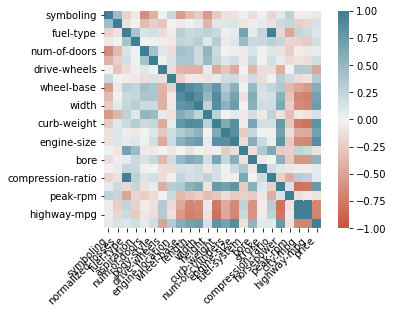

In [135]:
corr = Cleaned_Data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

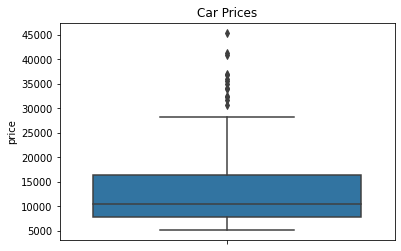

In [57]:
plt.title("Car Prices")
sns.boxplot(y=Cleaned_Data.price)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


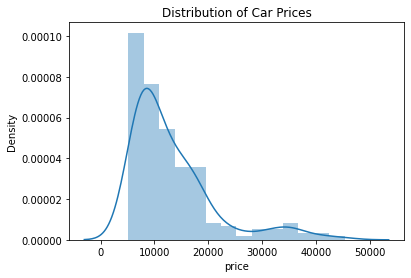

In [58]:
plt.title("Distribution of Car Prices")
sns.distplot(Cleaned_Data.price)
plt.show()

In [59]:
print(Cleaned_Data.price.describe())

count      205.000000
mean     13207.129353
std       7868.768212
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64


In [60]:
Cleaned_Data[Cleaned_Data.columns[0:]].corr()['price'][:]

symboling           -0.082201
normalized-losses    0.133999
fuel-type            0.110207
aspiration           0.177285
num-of-doors         0.057180
body-style           0.178642
drive-wheels        -0.490291
engine-location      0.331013
wheel-base           0.583168
length               0.682986
width                0.728699
height               0.134388
curb-weight          0.820825
num-of-cylinders     0.687770
engine-size          0.861752
fuel-system         -0.115521
bore                 0.532300
stroke               0.082095
compression-ratio    0.070990
horsepower           0.757917
peak-rpm            -0.100854
city-mpg            -0.667449
highway-mpg         -0.690526
price                1.000000
Name: price, dtype: float64

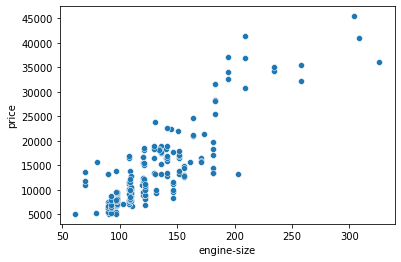

In [177]:
sns.scatterplot(x="engine-size", y="price", data=Cleaned_Data);

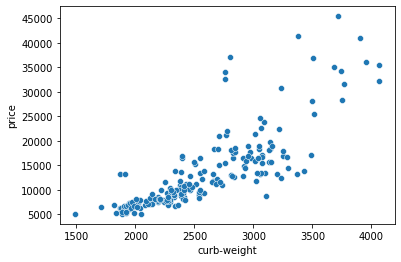

In [178]:
sns.scatterplot(x="curb-weight", y="price", data=Cleaned_Data);

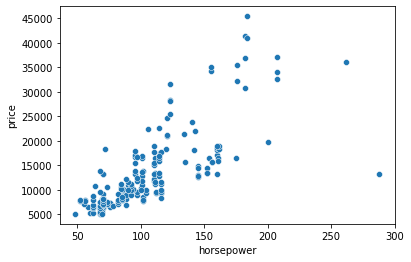

In [183]:
sns.scatterplot(x="horsepower", y="price", data=Cleaned_Data);

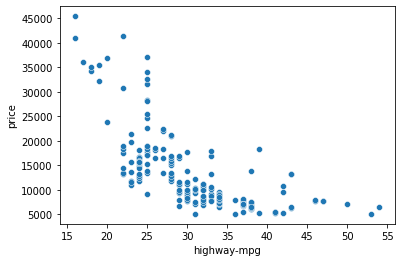

In [181]:
sns.scatterplot(x="highway-mpg", y="price", data=Cleaned_Data);

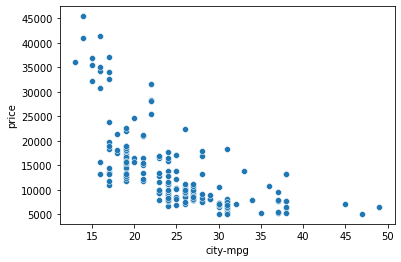

In [182]:
sns.scatterplot(x="city-mpg", y="price", data=Cleaned_Data);

Model Creation

In [61]:
Cleaned_Data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,2,4,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,1,1,2,2,1,1,94.5,171.2,65.5,52.4,2823,3,6,152,1,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,1,1,4,3,2,1,99.8,176.6,66.2,54.3,2337,1,4,109,1,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,1,1,4,3,4,1,99.4,176.6,66.4,54.3,2824,1,5,136,1,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [71]:
from sklearn.model_selection import train_test_split

X = Cleaned_Data.loc[:, ['symboling', 'normalized-losses', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']]
y = Cleaned_Data.loc[:,'price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [184]:
Coefficient_Dataframe = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
Coefficient_Dataframe

,Coefficient
symboling,241.534109
normalized-losses,-4.480103
fuel-type,-5090.234048
aspiration,1604.218035
num-of-doors,458.341150
body-style,-476.560156
drive-wheels,-1248.982201
engine-location,13675.908135
wheel-base,115.582814
length,-70.004907


In [73]:
print(regressor.intercept_)

-17411.57692819433


In [75]:
y_pred = regressor.predict(X_test)

In [76]:
Prediction_Frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Prediction_Frame

,Actual,Predicted
52,6795.0,6645.011778
181,15750.0,16983.956727
5,15250.0,14009.175656
18,5151.0,-297.521734
188,9995.0,11285.351000
...,...,...
198,18420.0,16190.084091
143,9960.0,10050.060102
24,6229.0,7996.022781
30,6479.0,1652.021099


In [176]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score: ', metrics.r2_score(y_test, y_pred))
print('Explained Variance Score: ', metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 2929.7148881358653
Mean Squared Error: 19681481.204782143
Root Mean Squared Error: 4436.381544094483
R Squared Score:  0.6724444782976456
Explained Variance Score:  0.6770069282135331


As this is the first INITIAL model, the model has an accuracy of only 66.5% based off of the relation between Root Mean Squared Error and the Mean of the Dataset's Car Prices. 